# Анализ данных Titanic
## Подготовка данных

### Шаг 1. Загрузка данных
Мы загрузим данные `train.csv` и `test.csv` и объединим их в один DataFrame для дальнейшего анализа.

In [1]:
import pandas as pd

In [9]:
# Загрузка данных
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# Просмотр первых строк каждого набора данных
display(train.head())
display(test.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Шаг 2. Объединение данных

Теперь мы добавим столбец `Survived` к датасету `test`, заполнив его значениями `NaN`, чтобы структура данных совпадала с `train`. После этого объединим оба набора данных в один `DataFrame` по ключу `PassengerId`.

In [8]:
# Добавляем столбец 'Survived' в тестовый набор данных и заполняем его значениями NaN
test["Survived"] = None

# Объединение train и test в один DataFrame
df = pd.concat([train, test], axis=0, ignore_index=True)

# Просмотр первых строк объединённого DataFrame
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Шаг 3. Преобразование типов данных

В этом шаге мы приведем типы данных некоторых столбцов к категории, как требует задание:
- `Survived` — тип `category`, так как это бинарная переменная (выжил или нет).
- `Pclass` — тип `category`, чтобы отразить классы пассажиров (1, 2 или 3).
- `Sex` — тип `category` для обозначения пола пассажира.

In [10]:
# Преобразуем столбцы в категориальные данные
df["Survived"] = df["Survived"].astype("category")
df["Pclass"] = df["Pclass"].astype("category")
df["Sex"] = df["Sex"].astype("category")

# Проверим типы данных, чтобы убедиться, что преобразование выполнено правильно
df.dtypes

PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
dtype: object

### Комментарий к подготовке данных

- Мы загрузили два набора данных `train` и `test`.
- Добавили недостающий столбец `Survived` в `test` и объединили оба набора данных в один `DataFrame`.
- Преобразовали типы данных для следующих столбцов:
  - `Survived` — категориальный, чтобы отметить, выжил пассажир или нет.
  - `Pclass` — категориальный, чтобы разделить данные по классам.
  - `Sex` — категориальный для обозначения пола пассажиров.

## Анализ таблицы

### Шаг 1. Визуализация базовой статистики
В этом шаге мы сначала выводим базовую статистику для всех столбцов в нашем датасете, чтобы понять общие характеристики данных. После этого определим, в каком классе было больше всего пассажиров.

In [17]:
# Базовая статистика таблицы
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,891.0,1309.0,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,2.0,3.0,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,0.0,3.0,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,549.0,709.0,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,NaN,NaN,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,NaN,NaN,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,NaN,NaN,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,NaN,NaN,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [18]:
# Класс с наибольшим числом пассажиров
most_common_class = df["Pclass"].value_counts().idxmax()
print("Класс с наибольшим числом пассажиров:", most_common_class)

Класс с наибольшим числом пассажиров: 3


**Ответ**:
- Класс с наибольшим колчичеством пассажиров: Класс 3.

### Шаг 2. Сгруппировка по классу и полу
В этом шаге мы сгруппируем данные по двум уровням: класс и пол, и вычислим средний возраст для каждой комбинации. А затем определим, кто является самым юным, а кто самым взрослым среди возможных комбинаций класс/пол. Также мы посчитаем разницу в возрасте между самым юным и самым взрослым.

In [21]:
# Группировка по классу и полу и вычисление среднего возраста
age_by_class_and_sex = df.groupby(["Pclass", "Sex"], observed=False)["Age"].mean()
display(age_by_class_and_sex)

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

In [31]:
# Группировка по классу и полу и вычисление среднего возраста
age_by_class_and_sex = df.groupby(["Pclass", "Sex"], observed=True)["Age"].mean()
display(age_by_class_and_sex)  

# Находим самую юную и самую взрослую комбинации
youngest_group = age_by_class_and_sex.idxmin()
oldest_group = age_by_class_and_sex.idxmax()

# Средний возраст для самых юных и самых взрослых групп
youngest_age = age_by_class_and_sex.min()
oldest_age = age_by_class_and_sex.max()

# Разница в возрасте
age_difference = oldest_age - youngest_age

# Выводим результаты
print(f"Самая юная группа: Класс {youngest_group[0]}, {youngest_group[1]} с средним возрастом {youngest_age:.1f}")
print(f"Самая взрослая группа: Класс {oldest_group[0]}, {oldest_group[1]} с средним возрастом {oldest_age:.1f}")
print(f"Разница в возрасте: {age_difference:.1f} лет")

Pclass  Sex   
1       female    37.037594
        male      41.029272
2       female    27.499223
        male      30.815380
3       female    22.185329
        male      25.962264
Name: Age, dtype: float64

Самая юная группа: Класс 3, female с средним возрастом 22.2
Самая взрослая группа: Класс 1, male с средним возрастом 41.0
Разница в возрасте: 18.8 лет


**Ответ**:
- Самая юная группа: Класс 3, female с средним возрастом 22 года.
- Самая взрослая группа: Класс 1, male с средним возрастом 41 год.
- Разница в возрасте: 19 лет.

### Шаг 3. Выжившие пассажиры с фамилией на "К", отсортированные по стоимости билета
Мы выберем из датасета только тех пассажиров, которые выжили, и у которых фамилия начинается с буквы "К". Затем отсортируем этих пассажиров по стоимости билета, чтобы определить, кто заплатил больше всех и кто заплатил меньше всех.

In [33]:
# Фильтрация только выживших пассажиров
survived_passengers = df[df["Survived"] == 1]
display(survived_passengers.head())  # Просмотр первых строк для проверки

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [34]:
# Выбор фамилий, начинающихся на "К"
# Разделим имя, чтобы взять первую букву фамилии
survived_k_passengers = survived_passengers[survived_passengers["Name"].str.startswith("K")]
display(survived_k_passengers.head())  # Просмотр первых строк для проверки

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S


In [35]:
# Сортировка по убыванию стоимости билета
sorted_k_passengers = survived_k_passengers.sort_values(by="Fare", ascending=False)
display(sorted_k_passengers.head())  # Проверим сортировку

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
621,622,1,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S
457,458,1,1,"Kenyon, Mrs. Frederick R (Marion)",female,NaN,1,0,17464,51.8625,D21,S
316,317,1,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S
184,185,1,3,"Kink-Heilmann, Miss. Luise Gretchen",female,4.0,0,2,315153,22.0250,NaN,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,NaN,S


In [36]:
# Определение пассажиров с максимальной и минимальной оплатой
highest_fare_passenger = sorted_k_passengers.iloc[0]
lowest_fare_passenger = sorted_k_passengers.iloc[-1]

print(f"Пассажир с наибольшей оплатой: {highest_fare_passenger['Name']}, заплатил {highest_fare_passenger['Fare']}")
print(f"Пассажир с наименьшей оплатой: {lowest_fare_passenger['Name']}, заплатил {lowest_fare_passenger['Fare']}")

Пассажир с наибольшей оплатой: Kimball, Mr. Edwin Nelson Jr, заплатил 52.5542
Пассажир с наименьшей оплатой: Kelly, Miss. Mary, заплатил 7.75


**Ответ:**
- Пассажир с наибольшей оплатой: Kimball, Mr. Edwin Nelson Jr, заплатил 52.5542.
- Пассажир с наименьшей оплатой: Kelly, Miss. Mary, заплатил 7.75.

### Шаг 4. Максимальное количество родных у выжившего пассажира
Мы подсчитаем, сколько родных было у выжившего пассажира, и определим максимальное количество родных у одного выжившего пассажира. Создадим новый столбец `Relatives`, который будет суммой значений в столбцах `SibSp` (количество братьев, сестёр и супругов) и `Parch` (количество родителей и детей), отфильтруем только выживших пассажиров, найдём максимальное количество родных среди выживших пассажиров.

In [39]:
# Создаём столбец 'Relatives' как сумму столбцов 'SibSp' и 'Parch'
df['Relatives'] = df['SibSp'] + df['Parch']
display(df[['Survived', 'SibSp', 'Parch', 'Relatives']].head())  # Просмотр первых строк с новым столбцом

,Survived,SibSp,Parch,Relatives
0,0,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,0,1
4,0,0,0,0


In [40]:
# Фильтруем только выживших пассажиров
survived_passengers = df[df["Survived"] == 1]
display(survived_passengers[['Survived', 'Relatives']].head())  # Просмотр первых строк с выжившими пассажирами

,Survived,Relatives
1,1,1
2,1,0
3,1,1
8,1,2
9,1,1


In [41]:
# Находим максимальное количество родных у выживших пассажиров
max_relatives = survived_passengers['Relatives'].max()
print(f"Максимальное количество родных у выжившего пассажира: {max_relatives}")

Максимальное количество родных у выжившего пассажира: 6


**Ответ**:
- Максимальное количество родных у выжившего пассажира: 6.

### Шаг 5. Средняя стоимость билета для пассажиров с указанной и неуказанной каютой
В этом шаге мы рассчитаем среднюю стоимость билета для пассажиров, у которых указана каюта, и для тех, у кого она не указана. Мы сравним эти значения, чтобы понять, насколько они различаются. Разделим данные на две группы: с заполненными значениями в столбце Cabin и с пустыми значениями, для каждой группы вычислим среднюю стоимость билета, найдём разницу между средней стоимостью билетов для этих групп.

In [42]:
# Группируем данные на две категории: с указанной и не указанной каютой
with_cabin = df[df['Cabin'].notna()]  # Пассажиры, у которых указана каюта
without_cabin = df[df['Cabin'].isna()]  # Пассажиры, у которых каюта не указана

In [43]:
# Рассчитываем среднюю стоимость билета для каждой группы
avg_fare_with_cabin = with_cabin['Fare'].mean()
avg_fare_without_cabin = without_cabin['Fare'].mean()

In [44]:
# Рассчитываем разницу между средней стоимостью билетов
fare_difference = avg_fare_with_cabin - avg_fare_without_cabin

In [45]:
# Выводим результаты
print(f"Средняя стоимость билета для пассажиров с указанной каютой: {avg_fare_with_cabin:.2f}")
print(f"Средняя стоимость билета для пассажиров без указанной каюты: {avg_fare_without_cabin:.2f}")
print(f"Разница в средней стоимости билета: {fare_difference:.2f}")


Средняя стоимость билета для пассажиров с указанной каютой: 81.93
Средняя стоимость билета для пассажиров без указанной каюты: 19.13
Разница в средней стоимости билета: 62.80


**Ответ**:
- Средняя стоимость билета для пассажиров с указанной каютой: 81.93
- Средняя стоимость билета для пассажиров без указанной каюты: 19.13
- Разница в средней стоимости билета: 62.80

## Визуализация

Построим по данным таблицы 10 различных графиков. 5 графиков -- интерактивными, 1 график -- 3D. А также построим диаграмму sankey, которая покажет, как каждый класс пассажиров связан с полом, а также как эти группы распределяются по выживаемости.

### 3D график: Возраст, класс и стоимость билета
Этот график позволяет увидеть взаимосвязь между возрастом, классом и стоимостью билета. Визуализация в 3D помогает лучше понять, как эти переменные соотносятся, особенно при разделении по полу.

In [60]:
import plotly.express as px

fig = px.scatter_3d(df, x='Age', y='Fare', z='Pclass', color='Sex', title="3D график: Возраст, класс и стоимость билета")
fig.show()

### Интерактивная точечная диаграмма: Распределение по возрасту и стоимости билета
Этот график отображает распределение пассажиров по возрасту и стоимости билета. Размер точек зависит от класса пассажира (Pclass), а цвет точек показывает, выжил ли пассажир (синие точки - выжившие, красные - невыжившие). При наведении на точку можно увидеть дополнительную информацию о пассажире, такую как его имя. Этот график помогает понять, как различается возраст, стоимость билета и выживаемость в зависимости от класса.

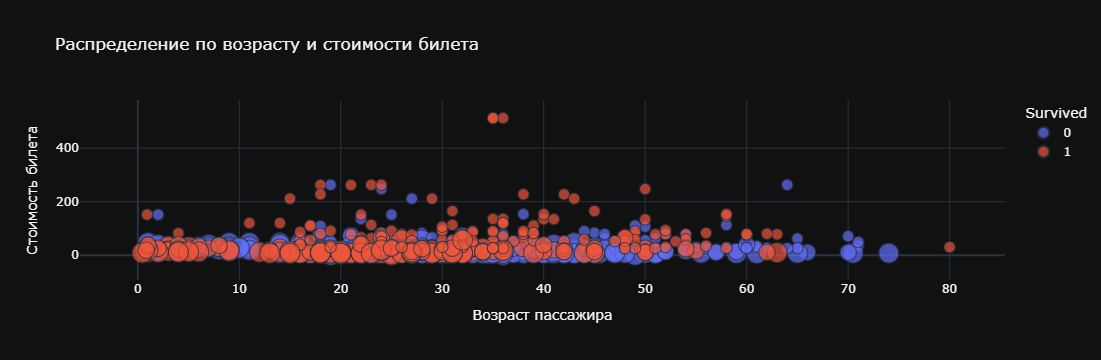

In [61]:
import plotly.express as px

# Создаем точечную диаграмму
fig = px.scatter(df, 
                 x='Age', 
                 y='Fare', 
                 color='Survived',  # Цвет точек зависит от выживания
                 size='Pclass',  # Размер точек зависит от класса
                 hover_data=['Name'],  # Дополнительная информация при наведении
                 title="Интерактивная точечная диаграмма: Распределение по возрасту и стоимости билета")

# Обновляем оформление графика
fig.update_layout(
    title="Распределение по возрасту и стоимости билета", 
    xaxis_title="Возраст пассажира", 
    yaxis_title="Стоимость билета",
    template="plotly_dark"  # Темный шаблон для графика
)

# Отображаем график
fig.show()


### Интерактивный линейный график: Выживаемость по классам и полу
Этот график показывает, как выживаемость различается по классам и полу пассажиров. Он позволяет динамически исследовать данные и увидеть, как менялась выживаемость в зависимости от этих переменных.

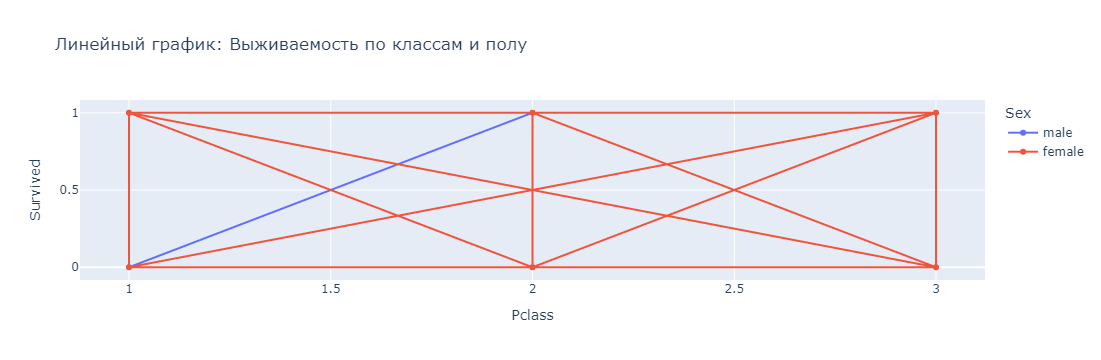

In [62]:
fig = px.line(df, x='Pclass', y='Survived', color='Sex', title="Линейный график: Выживаемость по классам и полу")
fig.update_traces(mode='markers+lines')
fig.show()

### Интерактивная гистограмма: Распределение пассажиров по возрасту
Гистограмма помогает понять распределение возрастов среди пассажиров, а интерактивность позволяет исследовать различия между выжившими и погибшими.

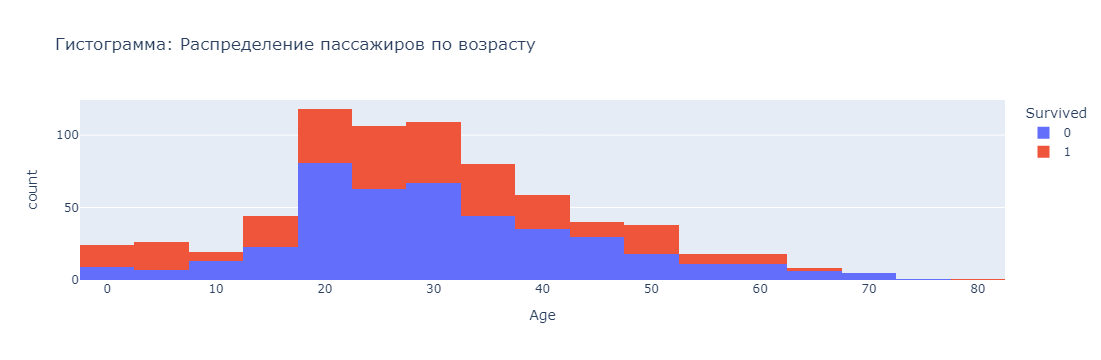

In [65]:
fig = px.histogram(df, x='Age', nbins=30, color='Survived', title="Гистограмма: Распределение пассажиров по возрасту")
fig.show()

### Интерактивная столбчатая диаграмма: Выживаемость по классам
Этот столбчатый график позволяет динамически исследовать, как выживаемость различалась по классам. Цвета столбцов разделяют выживших и погибших пассажиров.

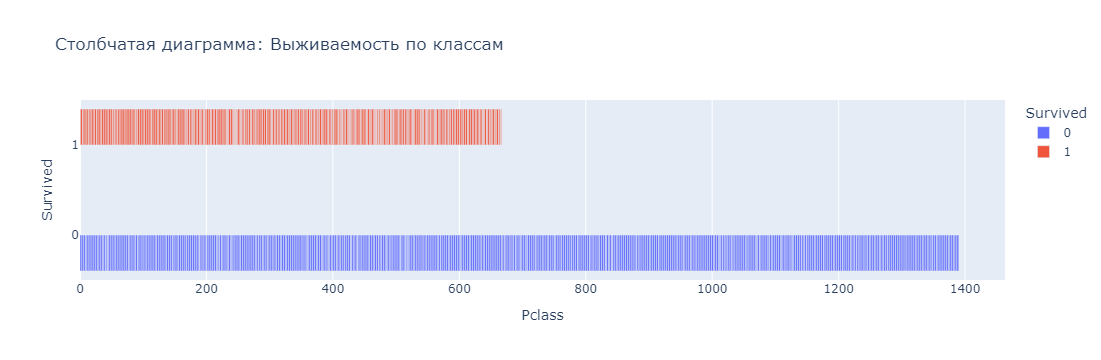

In [66]:
fig = px.bar(df, x='Pclass', y='Survived', color='Survived', barmode='group', title="Столбчатая диаграмма: Выживаемость по классам")
fig.show()

### Интерактивная круговая диаграмма: Процент выживших и погибших
Этот график позволяет легко увидеть, какой процент пассажиров выжил и сколько погибло, с возможностью более детального анализа.

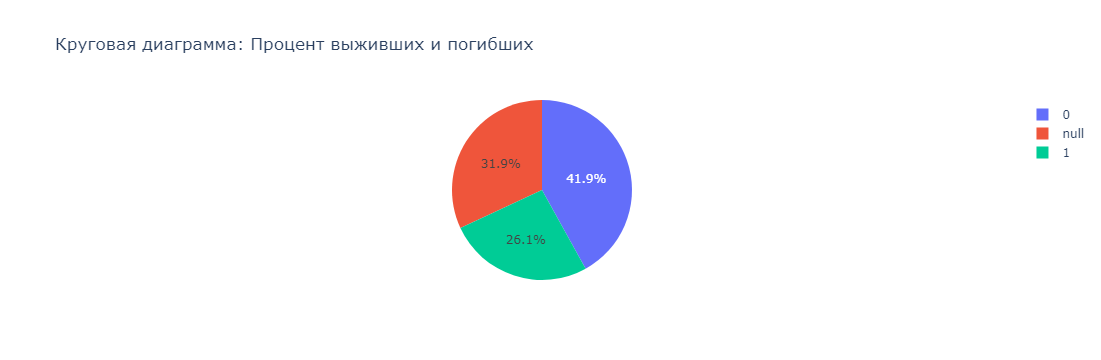

In [67]:
fig = px.pie(df, names='Survived', title="Круговая диаграмма: Процент выживших и погибших")
fig.show()

### Горизонтальная гистограмма: Распределение стоимости билетов
Этот график помогает понять, как распределяются стоимости билетов среди пассажиров, показывая, что большая часть пассажиров заплатила меньшие суммы.

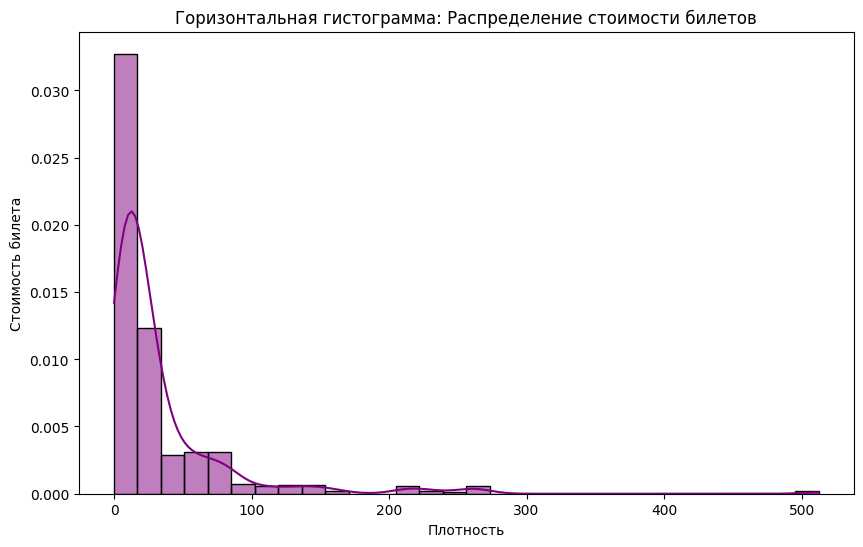

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Создание фигуры для графика
plt.figure(figsize=(10, 6))

# Используем histplot для создания горизонтальной гистограммы
sns.histplot(df['Fare'], kde=True, bins=30, color='purple', stat='density', orientation='horizontal')

# Настроим заголовок и метки осей
plt.title('Горизонтальная гистограмма: Распределение стоимости билетов')
plt.xlabel('Плотность')
plt.ylabel('Стоимость билета')

# Показать график
plt.show()

### Прямоугольная диаграмма: Количество пассажиров по классам и полу
Этот график показывает количество пассажиров по классам и полу. Мы видим, что в классе 3 преобладает мужской пол.

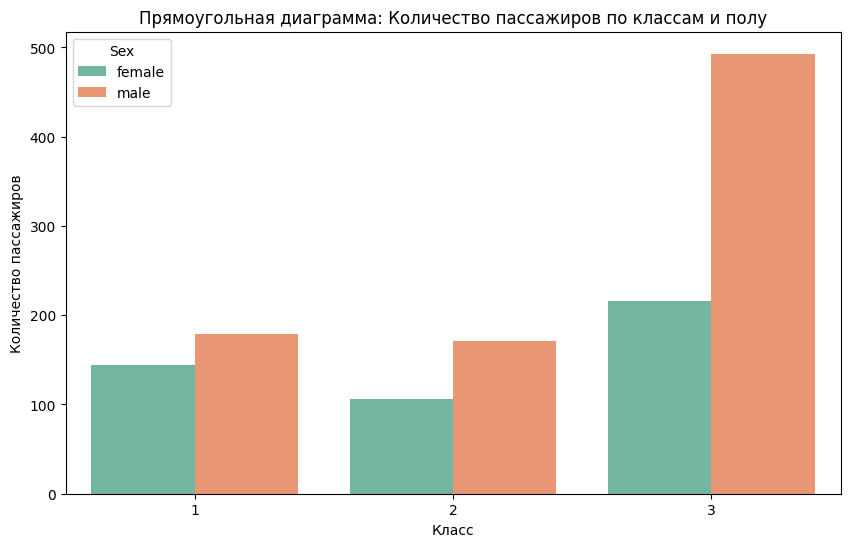

In [91]:
class_sex_counts = df.groupby(['Pclass', 'Sex'], observed=False).size().reset_index(name='Count')

plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Count', hue='Sex', data=class_sex_counts, palette='Set2')
plt.title('Прямоугольная диаграмма: Количество пассажиров по классам и полу')
plt.xlabel('Класс')
plt.ylabel('Количество пассажиров')
plt.show()


### Диаграмма солнечных лучей: Иерархия пассажиров по классу, полу и выживаемости
Эта диаграмма помогает визуализировать иерархию данных, показывая, как разные категории (класс, пол, выживаемость) соотносятся друг с другом.

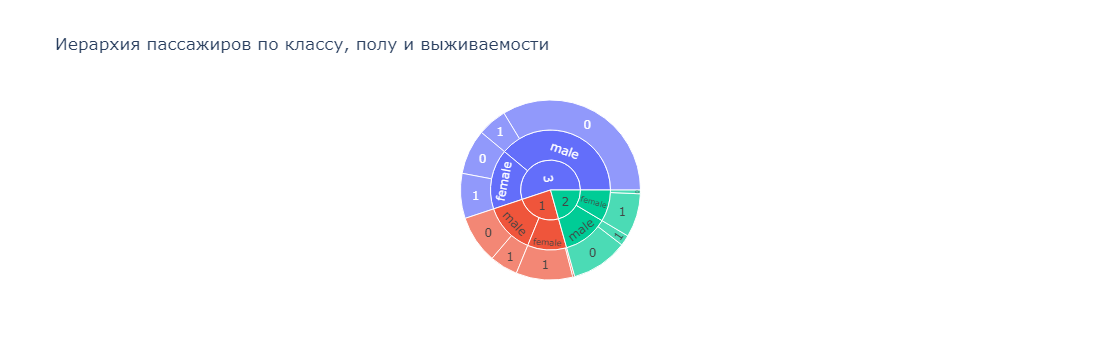

In [86]:
# Удаление строк с пропущенными значениями в интересующих столбцах
df_clean = df.dropna(subset=['Pclass', 'Sex', 'Survived'])

# Создание графика Sunburst 
fig = px.sunburst(df_clean, path=['Pclass', 'Sex', 'Survived'], title="Иерархия пассажиров по классу, полу и выживаемости")
fig.show()


### График распределения выживаемости по классу и полу
Этот график позволяет наглядно увидеть, как выживаемость различается по классам и полу. Цвета столбцов показывают, как соотносятся выжившие и погибшие среди мужчин и женщин.

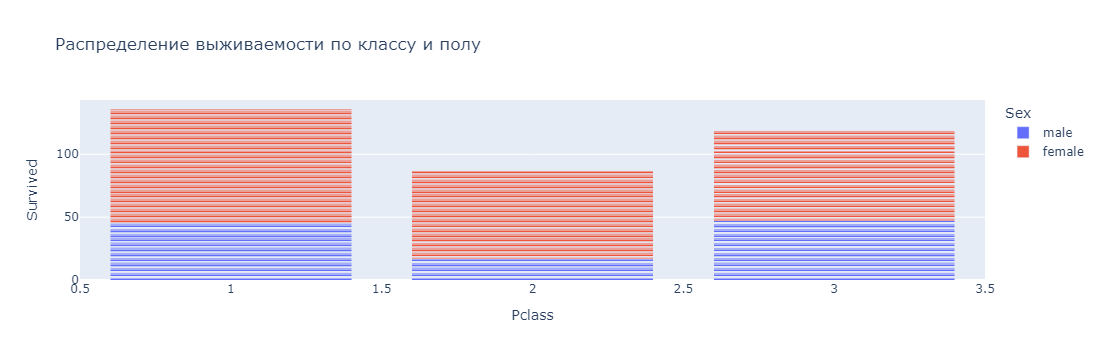

In [87]:
fig = px.bar(df, x='Pclass', color='Sex', y='Survived', barmode='stack', title="Распределение выживаемости по классу и полу")
fig.show()

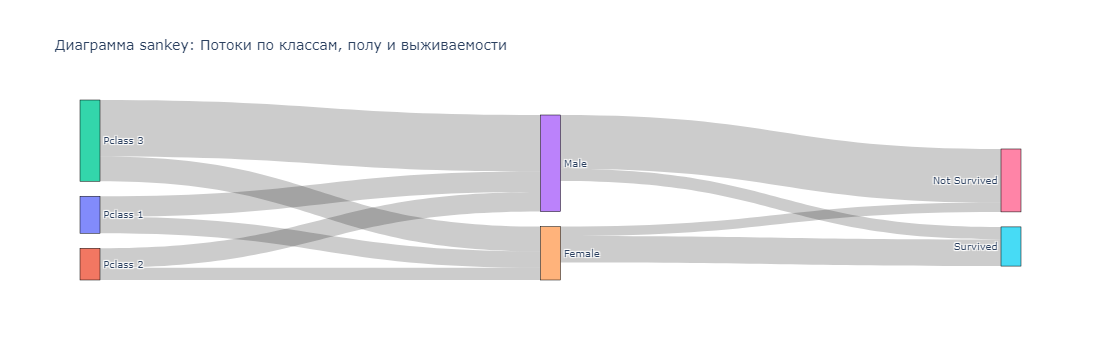

In [92]:
# Преобразуем столбцы в строки для использования в диаграмме Санки
labels = ['Pclass 1', 'Pclass 2', 'Pclass 3', 'Male', 'Female', 'Survived', 'Not Survived']

# Создаем потоки между категориями
source = ['Pclass 1', 'Pclass 1', 'Pclass 2', 'Pclass 2', 'Pclass 3', 'Pclass 3', 'Male', 'Female', 'Male', 'Female']
target = ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Survived', 'Survived', 'Not Survived', 'Not Survived']
values = [
    df[(df['Pclass'] == 1) & (df['Sex'] == 'male')].shape[0],  # Количество мужчин в 1 классе
    df[(df['Pclass'] == 1) & (df['Sex'] == 'female')].shape[0],  # Количество женщин в 1 классе
    df[(df['Pclass'] == 2) & (df['Sex'] == 'male')].shape[0],  # Количество мужчин в 2 классе
    df[(df['Pclass'] == 2) & (df['Sex'] == 'female')].shape[0],  # Количество женщин в 2 классе
    df[(df['Pclass'] == 3) & (df['Sex'] == 'male')].shape[0],  # Количество мужчин в 3 классе
    df[(df['Pclass'] == 3) & (df['Sex'] == 'female')].shape[0],  # Количество женщин в 3 классе
    df[(df['Survived'] == 1) & (df['Sex'] == 'male')].shape[0],  # Количество выживших мужчин
    df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0],  # Количество выживших женщин
    df[(df['Survived'] == 0) & (df['Sex'] == 'male')].shape[0],  # Количество погибших мужчин
    df[(df['Survived'] == 0) & (df['Sex'] == 'female')].shape[0]   # Количество погибших женщин
]

# Индексы для источников и целей
sources = [labels.index(src) for src in source]
targets = [labels.index(tgt) for tgt in target]

# Создаем диаграмму sankey
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

# Заголовок и отображение
fig.update_layout(title_text="Диаграмма sankey: Потоки по классам, полу и выживаемости", font_size=10)
fig.show()